### 1.1 Chọn đối tượng trong ảnh

(1427, 2100, 3)


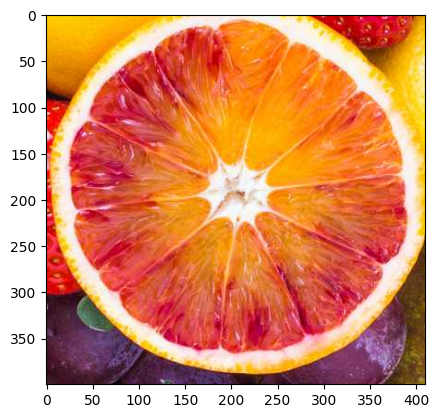

In [ ]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
data = iio.imread('fruit.jpg')
bmg = data[800:1200, 570:980]
print(data.shape)

iio.imsave('orange.jpg', bmg)
plt.imshow(bmg)
plt.show()

### 1.2 Tịnh tiến đơn

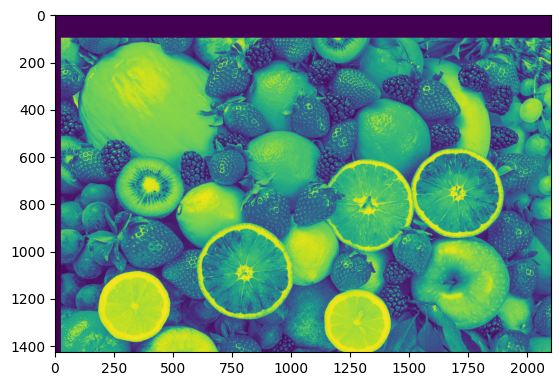

In [ ]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

data = iio.imread('fruit.jpg', mode='L')
bdata = nd.shift(data, (100, 25))

plt.imshow(bdata)
plt.show()

### 1.3 Thay đổi kích thước ảnh

(1427, 2100, 3)
(2854, 4200, 6)
(2854, 4200, 3)
(714, 1890, 3)


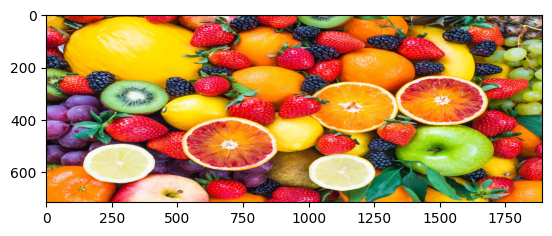

In [ ]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

data = iio.imread('fruit.jpg')
print(data.shape)
bdata = nd.zoom(data, 2)
print(bdata.shape)
data2 = nd.zoom(data, (2, 2, 1))
print(data2.shape)
data3 = nd.zoom(data, (0.5, 0.9, 1))
print(data3.shape)

plt.imshow(data3)
plt.show()

### 1.4 Xoay ảnh

(1427, 2100, 3)


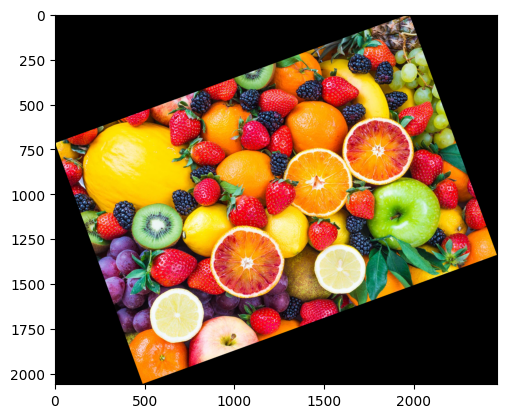

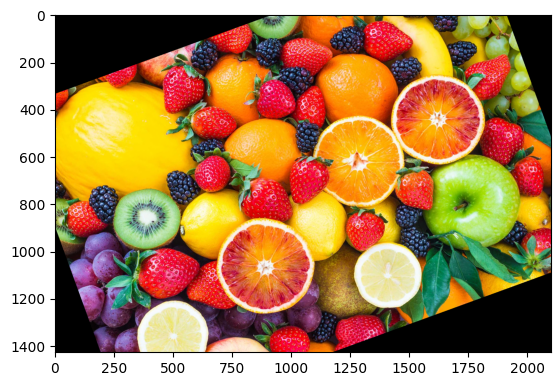

In [ ]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

data = iio.imread('fruit.jpg')
print(data.shape)

d1 = nd.rotate(data, 20)
plt.imshow(d1)
plt.show()

d2 = nd.rotate(data, 20, reshape=False)

plt.imshow(d2)
plt.show()

### 1.5 Dilation và Erosion

(309, 515)


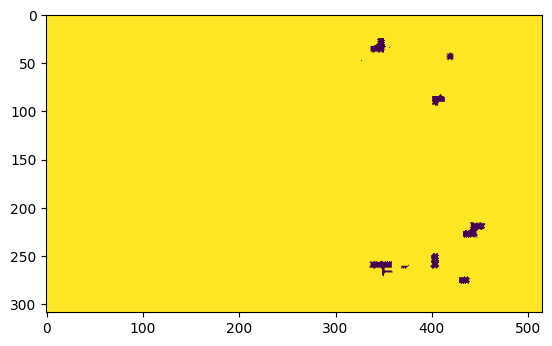

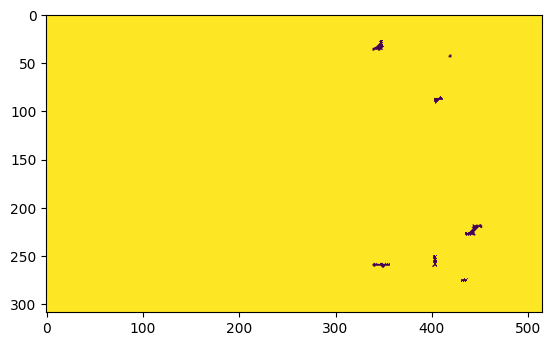

In [ ]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

data = iio.imread('world_cup.jpg', mode='L')
print(data.shape)

d1 = nd.binary_dilation(data)
plt.imshow(d1)
plt.show()

d2 = nd.binary_dilation(data, iterations=3)
plt.imshow(d2)
plt.show()

### 1.6 Coordinate Mapping

(309, 515)


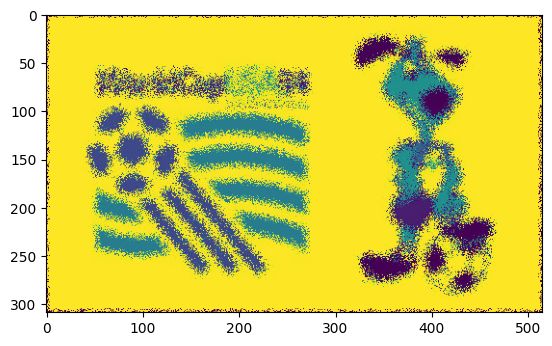

In [ ]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

data = iio.imread('world_cup.jpg', mode='L')
print(data.shape)
V, H = data.shape

M = np.indices((V, H))
d = 5
q = 2 * d * np.random.ranf(M.shape) - d
mp = (M + q).astype(int)
d1 = nd.map_coordinates(data, mp)
plt.imshow(d1)
plt.show()

### 1.7 Biến đổi chung (Generic Tranformation)

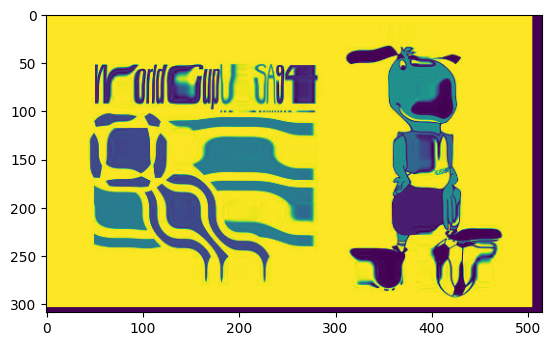

In [ ]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

def GeoFun(outcoord):
  a = 10 * np.cos(outcoord[0]/10.0) + outcoord[0]
  b = 10 * np.cos(outcoord[1]/10.0) + outcoord[1]
  return a, b

data = iio.imread('world_cup.jpg', mode='L')

d1 = nd.geometric_transform(data, GeoFun)
plt.imshow(d1)
plt.show()

### Bài 1

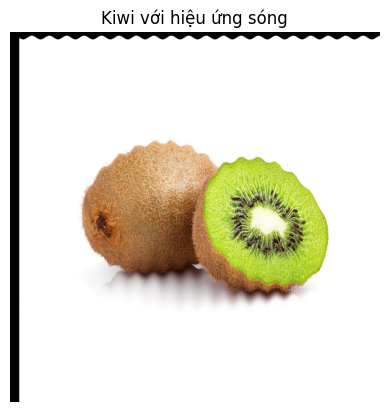

In [18]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
from scipy.ndimage import map_coordinates, shift

kiwi = iio.imread('kiwi.jpg')
kiwi_shifted = shift(kiwi, shift=(30, 50, 0))

rows, cols, ch = kiwi_shifted.shape
x, y = np.meshgrid(np.arange(cols), np.arange(rows))
wave_y = y + 10 * np.sin(x / 15)
coords = np.array([wave_y, x])
kiwi_wave = np.zeros_like(kiwi_shifted)
for i in range(3):
    kiwi_wave[..., i] = map_coordinates(kiwi_shifted[..., i], coords, order=1, mode='reflect')

iio.imwrite('kiwi_wave.jpg', kiwi_wave.astype(np.uint8))
plt.imshow(kiwi_wave)
plt.title('Kiwi với hiệu ứng sóng')
plt.axis('off')
plt.show()

### Bài 2

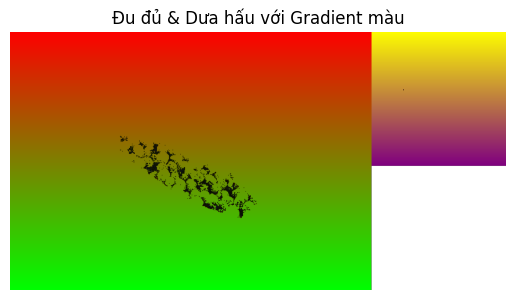

In [19]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

def apply_gradient(image, start_color, end_color):
    h, w, _ = image.shape
    gradient = np.linspace(start_color, end_color, h).astype(np.uint8)
    gradient_img = np.tile(gradient[:, None, :], (1, w, 1))

    mask = np.mean(image, axis=2) > 20
    new_image = image.copy()
    new_image[mask] = gradient_img[mask]
    return new_image

papaya = iio.imread('papaya.jpg')
watermelon = iio.imread('watermelon.jpg')

papaya_grad = apply_gradient(papaya, start_color=[255, 0, 0], end_color=[0, 255, 0])      # Đỏ → Xanh lá
watermelon_grad = apply_gradient(watermelon, start_color=[255, 255, 0], end_color=[128, 0, 128])  # Vàng → Tím

h = max(papaya_grad.shape[0], watermelon_grad.shape[0])
w = papaya_grad.shape[1] + watermelon_grad.shape[1]
canvas = np.zeros((h, w, 4), dtype=np.uint8)

canvas[:papaya_grad.shape[0], :papaya_grad.shape[1], :3] = papaya_grad
canvas[:papaya_grad.shape[0], :papaya_grad.shape[1], 3] = 255  # Alpha 100%
canvas[:watermelon_grad.shape[0], papaya_grad.shape[1]:, :3] = watermelon_grad
canvas[:watermelon_grad.shape[0], papaya_grad.shape[1]:, 3] = 255

iio.imwrite('papaya_watermelon_gradient.png', canvas)
plt.imshow(canvas)
plt.title('Đu đủ & Dưa hấu với Gradient màu')
plt.axis('off')
plt.show()


### Bài 3

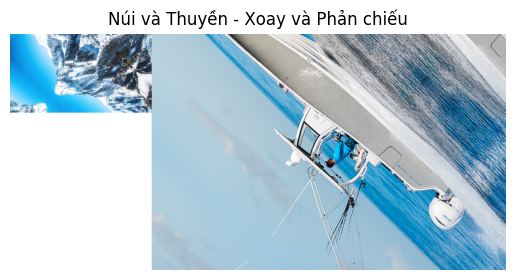

In [20]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

mountain = iio.imread('mountain.jpg')
boat = iio.imread('boat.jpg')

mountain_rot = rotate(mountain, 45, reshape=False, mode='reflect')
boat_rot = rotate(boat, 45, reshape=False, mode='reflect')

mountain_mirror = np.flipud(mountain_rot)
boat_mirror = np.flipud(boat_rot)

h = max(mountain_mirror.shape[0], boat_mirror.shape[0])
w = mountain_mirror.shape[1] + boat_mirror.shape[1]
canvas = np.ones((h, w, 3), dtype=np.uint8) * 255

canvas[:mountain_mirror.shape[0], :mountain_mirror.shape[1], :] = mountain_mirror
canvas[:boat_mirror.shape[0], mountain_mirror.shape[1]:, :] = boat_mirror

iio.imwrite('mountain_boat_mirror.jpg', canvas)
plt.imshow(canvas)
plt.title('Núi và Thuyền - Xoay và Phản chiếu')
plt.axis('off')
plt.show()

### Bài 4

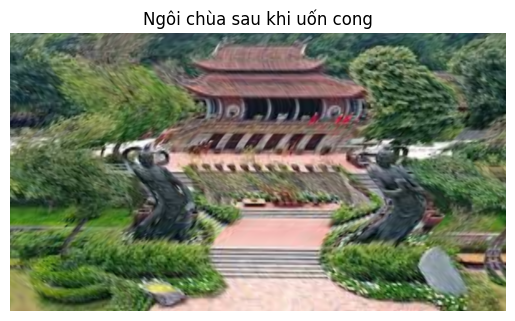

In [21]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
from scipy.ndimage import zoom, map_coordinates

pagoda = iio.imread('pagoda.jpg')

pagoda_zoomed = zoom(pagoda, (5, 5, 1), order=1)

rows, cols, ch = pagoda_zoomed.shape
x, y = np.meshgrid(np.arange(cols), np.arange(rows))
x_warp = x + 40 * np.sin(2 * np.pi * y / 300)
coords = np.array([y, x_warp])

warped = np.zeros_like(pagoda_zoomed)
for i in range(3):
    warped[..., i] = map_coordinates(pagoda_zoomed[..., i], coords, order=1, mode='reflect')

iio.imwrite('pagoda_warped.jpg', warped.astype(np.uint8))
plt.imshow(warped)
plt.title("Ngôi chùa sau khi uốn cong")
plt.axis('off')
plt.show()

### Bài 5


--- Chọn ảnh ---
1. kiwi.jpg
2. papaya.jpg
3. mountain.jpg
Nhập số tương ứng với ảnh (1-3): 2

--- Chọn phép biến đổi ---
1. Tịnh tiến
2. Xoay
3. Phóng to / Thu nhỏ
4. Làm mờ Gaussian
5. Biến dạng sóng
Nhập lựa chọn (1-5): 2
Nhập góc xoay (độ): 45
Giữ kích thước gốc? (y/n): y


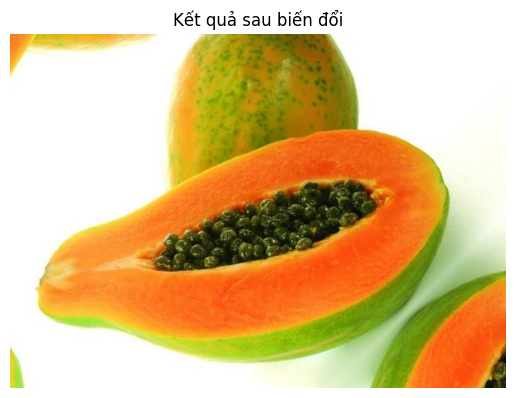

KeyboardInterrupt: Interrupted by user

In [24]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
from scipy.ndimage import shift, rotate, zoom, gaussian_filter, map_coordinates

def load_image():
    print("\n--- Chọn ảnh ---")
    print("1. kiwi.jpg")
    print("2. papaya.jpg")
    print("3. mountain.jpg")
    choice = input("Nhập số tương ứng với ảnh (1-3): ")
    files = {'1': 'kiwi.jpg', '2': 'papaya.jpg', '3': 'mountain.jpg'}
    return iio.imread(files.get(choice, 'kiwi.jpg'))

def translate_image(img):
    dx = int(input("Nhập số pixel dịch theo X: "))
    dy = int(input("Nhập số pixel dịch theo Y: "))
    return shift(img, shift=(dy, dx, 0))

def rotate_image(img):
    angle = float(input("Nhập góc xoay (độ): "))
    reshape = input("Giữ kích thước gốc? (y/n): ").lower() == 'n'
    return rotate(img, angle, reshape=reshape, mode='reflect')

def zoom_image(img):
    factor = float(input("Nhập hệ số phóng to/thu nhỏ (VD: 1.5 hoặc 0.5): "))
    return zoom(img, (factor, factor, 1))

def gaussian_blur(img):
    sigma = float(input("Nhập giá trị sigma cho Gaussian blur: "))
    return gaussian_filter(img, sigma=(sigma, sigma, 0))

def wave_transform(img):
    amplitude = float(input("Nhập biên độ sóng: "))
    rows, cols, _ = img.shape
    x, y = np.meshgrid(np.arange(cols), np.arange(rows))
    wave_y = y + amplitude * np.sin(x / 20)
    coords = np.array([wave_y, x])
    output = np.zeros_like(img)
    for i in range(3):
        output[..., i] = map_coordinates(img[..., i], coords, order=1, mode='reflect')
    return output

def main_menu():
    img = load_image()

    print("\n--- Chọn phép biến đổi ---")
    print("1. Tịnh tiến")
    print("2. Xoay")
    print("3. Phóng to / Thu nhỏ")
    print("4. Làm mờ Gaussian")
    print("5. Biến dạng sóng")

    option = input("Nhập lựa chọn (1-5): ")
    transform_functions = {
        '1': translate_image,
        '2': rotate_image,
        '3': zoom_image,
        '4': gaussian_blur,
        '5': wave_transform
    }

    if option in transform_functions:
        result = transform_functions[option](img)
        plt.imshow(result.astype(np.uint8))
        plt.axis('off')
        plt.title("Kết quả sau biến đổi")
        plt.show()

        save_path = input("Nhập tên file để lưu (vd: output.jpg): ")
        iio.imwrite(save_path, result.astype(np.uint8))
        print(f"Đã lưu ảnh tại: {save_path}")
    else:
        print("Lựa chọn không hợp lệ.")

if __name__ == "__main__":
    main_menu()